In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
gdp_df = pd.read_csv("../data/un_gdp.csv")

In [5]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [6]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [7]:
gdp_df = pd.read_csv("../data/un_gdp.csv", skipfooter=2, engine='python')

In [8]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [9]:
gdp_df = gdp_df.drop(["Value Footnotes"], axis=1)

In [10]:
gdp_df = gdp_df.rename({"Country or Area": "Country", "Value": "GDP_Per_Capita"}, axis="columns")

In [11]:
print("gdp_df shape: ", gdp_df.shape)
print(gdp_df.dtypes)

gdp_df shape:  (6868, 3)
Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


In [12]:
gdp_df['Year'] = pd.to_datetime(gdp_df['Year'], format='%Y')

In [13]:
gdp_df.dtypes

Country                   object
Year              datetime64[ns]
GDP_Per_Capita           float64
dtype: object

In [14]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019-01-01,2065.036398
1,Afghanistan,2018-01-01,2033.779002
2,Afghanistan,2017-01-01,2058.383832
3,Afghanistan,2016-01-01,2057.062164
4,Afghanistan,2015-01-01,2068.265904


In [15]:
gdp_df['Year'].value_counts() 
# Number of countries increases over the years.

2017-01-01    238
2016-01-01    238
2015-01-01    238
2014-01-01    238
2013-01-01    238
2012-01-01    237
2011-01-01    237
2018-01-01    237
2010-01-01    236
2009-01-01    236
2008-01-01    235
2007-01-01    235
2006-01-01    235
2005-01-01    234
2004-01-01    234
2003-01-01    233
2002-01-01    233
2001-01-01    232
2000-01-01    231
2019-01-01    231
1999-01-01    224
1998-01-01    223
1997-01-01    223
1996-01-01    221
1995-01-01    221
1994-01-01    214
1993-01-01    212
1992-01-01    209
1991-01-01    208
1990-01-01    207
Name: Year, dtype: int64

In [26]:
gdp_df['Country'].value_counts() 
# Number of countries increases over the years.

Lebanon                      30
Middle income                30
Morocco                      30
Mozambique                   30
Myanmar                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

In [16]:
for x in range(1990,2022):
    tmp_merge = pd.merge(gdp_df[gdp_df['Year'] == str(x) + '-01-01'], gdp_df[gdp_df['Year'] == str(x + 1)  + '-01-01'], on='Country', how='right')
    added_countries = tmp_merge[tmp_merge.GDP_Per_Capita_x.isnull()]['Country'].tolist()
    if (added_countries): print("Year added: " + str(x+1), ', '.join(added_countries))

Year added: 1991 Hungary
Year added: 1992 Slovak Republic
Year added: 1993 Cambodia, Estonia, Small states
Year added: 1994 Bosnia and Herzegovina, West Bank and Gaza
Year added: 1995 Croatia, Kuwait, Latvia, Lithuania, Maldives, Moldova, Serbia
Year added: 1997 Montenegro, San Marino
Year added: 1999 Libya
Year added: 2000 CuraÃ§ao, Kosovo, Liberia, Other small states, Palau, Qatar, Timor-Leste
Year added: 2001 SÃ£o TomÃ© and Principe
Year added: 2002 Afghanistan
Year added: 2004 Nauru
Year added: 2006 Cayman Islands
Year added: 2009 Sint Maarten (Dutch part)
Year added: 2011 Turks and Caicos Islands
Year added: 2013 Djibouti


In [17]:
gdp_2014 = gdp_df[gdp_df['Year'] == '2014-01-01'].reset_index()

In [18]:
gdp_2014['GDP_Per_Capita'].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

(array([52., 27., 14., 32., 21., 12.,  5., 11.,  9.,  4.,  6.,  6.,  4.,
         5.,  4.,  6.,  4.,  3.,  3.,  2.,  3.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   822.61045782,   3936.44092566,   7050.2713935 ,  10164.10186133,
         13277.93232917,  16391.76279701,  19505.59326485,  22619.42373269,
         25733.25420053,  28847.08466837,  31960.91513621,  35074.74560405,
         38188.57607189,  41302.40653973,  44416.23700757,  47530.06747541,
         50643.89794325,  53757.72841109,  56871.55887893,  59985.38934676,
         63099.2198146 ,  66213.05028244,  69326.88075028,  72440.71121812,
         75554.54168596,  78668.3721538 ,  81782.20262164,  84896.03308948,
         88009.86355732,  91123.69402516,  94237.524493  ,  97351.35496084,
        100465.18542868, 103579.01589652, 106692.84636435, 109806.67683219,
        112920.50730003, 116034.

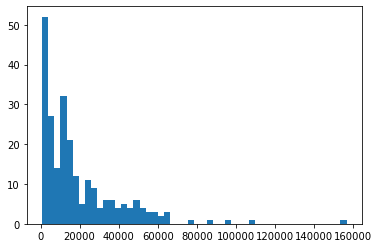

In [19]:
plt.hist(gdp_2014['GDP_Per_Capita'], 50)
# right skewed

In [20]:
gdp_2014.sort_values(by="GDP_Per_Capita", ascending=False).head(5)
# Top 5 countries by GDP in 2014

,index,Country,Year,GDP_Per_Capita
128,3721,"Macao SAR, China",2014-01-01,156514.133850
127,3691,Luxembourg,2014-01-01,108760.916030
177,5138,Qatar,2014-01-01,95578.416973
189,5464,Singapore,2014-01-01,87808.663157
19,561,Bermuda,2014-01-01,77361.104881


In [21]:
gdp_2014.sort_values(by="GDP_Per_Capita").head(5)
# Bottom 5 countries by GDP in 2014

,index,Country,Year,GDP_Per_Capita
36,1047,Central African Republic,2014-01-01,822.610458
28,827,Burundi,2014-01-01,886.235777
130,3781,Malawi,2014-01-01,1027.208496
49,1422,Dem. Rep. Congo,2014-01-01,1029.790785
156,4528,Niger,2014-01-01,1127.615541


In [22]:
gdp_1990_2017 = gdp_df[(gdp_df['Year'] == '1990-01-01') | (gdp_df['Year'] == '2017-01-01')]
gdp_pivoted = gdp_1990_2017.pivot(index='Country', columns='Year', values='GDP_Per_Capita').dropna()

In [23]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted['2017-01-01'] - gdp_pivoted['1990-01-01']) / gdp_pivoted['1990-01-01']

In [24]:
print("Number of countries with negative growth from 1990 to 2017:", gdp_pivoted[gdp_pivoted['Percent_Change'] < 0].shape[0])

Number of countries with negative growth from 1990 to 2017: 17


In [34]:
print("Country with the highest growth rate from 1990 to 2017:", 
      gdp_pivoted[gdp_pivoted['Percent_Change'] == gdp_pivoted['Percent_Change'].max()].index[0])

Country with the highest growth rate from 1990 to 2017: Equatorial Guinea


No handles with labels found to put in legend.


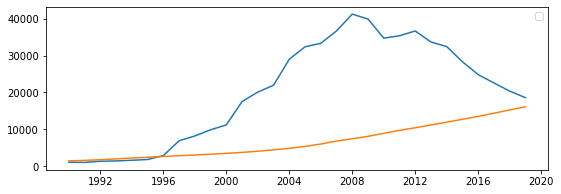

In [45]:
plt.figure(figsize=(9, 3))

plt.plot(gdp_df[gdp_df['Country'] == 'Equatorial Guinea']['Year'],
         gdp_df[gdp_df['Country'] == 'Equatorial Guinea']['GDP_Per_Capita'])
plt.plot(gdp_df[gdp_df['Country'] == 'China']['Year'],
         gdp_df[gdp_df['Country'] == 'China']['GDP_Per_Capita'])
plt.legend()

In [43]:
gdp_pivoted.sort_values(by='Percent_Change', ascending=False)

Year,1990-01-01 00:00:00,2017-01-01 00:00:00,Percent_Change
Country,,,
Equatorial Guinea,1039.985049,22551.083246,2068.404561
China,1423.896348,14344.421239,907.406281
Myanmar,619.645144,4739.910118,664.939443
East Asia & Pacific (excluding high income),2173.223895,12986.322227,497.560254
East Asia & Pacific (IDA & IBRD),2196.950288,13123.151792,497.334945
...,...,...,...
Central African Republic,1201.677234,912.802052,-24.039332
Ukraine,15751.722440,11871.123624,-24.636028
Burundi,1184.842440,773.571858,-34.710993


In [40]:
gdp_df[gdp_df['Country'] == 'Equatorial Guinea']['GDP_Per_Capita']

KeyError: 0